# Resolución de Ecuaciones

In [1]:
# Para imprimir todas las líneas
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
# Solo la última
InteractiveShell.ast_node_interactivity = "last_expr"

Importación de las librerías necesarias

In [2]:
import numpy as np # biblioteca de cálculo numérico y análisis de datos
import pylab as plt # biblioteca para la generación de gráficos a partir de listas o arrays
from sympy import * # Librería de Cálculo
from sympy.plotting import plot as symplot # Librería para los gráficos
from sympy.abc import x, y, h # Carga de un simbólico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para los gráficos

## Encontrar raíces con solve() vs fsolve()
Si intentamos resolver las raíces de $f(x) = x^2- sin(x) - 1/2$

In [3]:
f = x**2 - sin(x) - 1/2
solveset(f,x)

ConditionSet(x, Eq(x**2 - sin(x) - 0.5, 0), Complexes)

 veremos que la función `solve()` falla y la `solveset()`, que muestra el conjunto de soluciones, no nos da ninguna información. Esto ocurre porque la función contiene un $sin(x)$ y `sympy` no pueden hacer manipulaciones simbólicas para llegar a una solución.  

En este caso es necesario _lambdificar_ f, es decir transformar la expresión simbólica en numérica (ver https://docs.sympy.org/latest/modules/utilities/lambdify.html) y luego recurrir a `scipy`. En donde usaremos `fsolve()`: 

In [4]:
from sympy import lambdify
from scipy.optimize import fsolve

f_np = lambdify(x, f, modules=['numpy'])
solution = fsolve(f_np, 0.5)
print(solution)

[1.19608203]


O también podríamos haber evitado el `lambdify` haciendo: 


In [5]:
from sympy import lambdify
from scipy.optimize import fsolve

def f_np(x): 
  return [x[0]**2 - sin(x[0]) - 1/2]

solution = fsolve(f_np, 0.5)
print(solution)

[1.19608203]


Si vemos la documentación de `fsolve()` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) nos damos cuenta de que se precisa de un punto inicial, en este caso 0.5, para lanzar la búsqueda de la solución.

Estudiemos gráficamente la función para ver por donde habría que empezar:

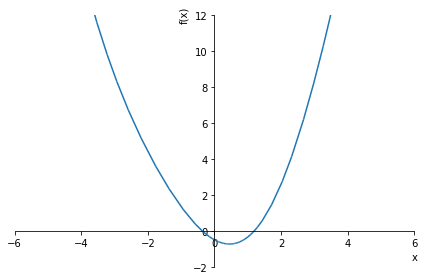

In [6]:
p = symplot(f, xlim=(-6,6), ylim=(-2,12)) 

Vemos que el teorema de Bolzano se verifica en el invervalo [0,2] y también en el [-1,1]. Por ejemplo:

In [7]:
print(f.subs(x,0)*f.subs(x,2))
sign(f.subs(x,0)*f.subs(x,2))

-1.75 + 0.5*sin(2)


-1

## Método de la Bisección

El **método de la Bisección** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$ con $ f(a_i)f(b_i) < 0 $, ∀i

Salida: $ c_i $

**Algoritmo**:
1. Calculamos el punto medio del intervalo como $ c_i = (a_i + b_i)/2 $, 
2. Comprobamos si cumple Bolzano, $ f(a_i)f(c_i) < 0 $, entonces $ b_{i+1} = c_i $, $ a_{i+1} = a_i $, en caso contrario $ a_{i+1} = c_i $, $b_{i+1} = b_i $
3. Paramos si $ h_i < delta $ o $ |f(c_i)| < epsilon $ o $ i \geq n $
4. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método cerrado**, lo que significa que la raíz está en $[a_i, b_i]$

**Pseudocódigo**

```
BúsquedaPorBisección (f(x), a, b, Δ, ε, n)
  i:=0
  h:=abs(b-a)
  repetir
    i:=i+1
    c:=(a+b)/2
    h:=h/2
    si signo(f(a))*signo(f(c))<0 entonces
       b:=c
    si no
       a:=c
  hasta (abs(f(c)) ≤ ε) ó (h ≤ Δ) ó (i = n)
  devolver c
```

### Ejercicio 1
Construir una función llamada $biseccion(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Bisección, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[0, 2]$

h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
Maximo de iteraciones alcanzadas
1.1875


Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo $[−1, 0]$

h_n and f_c_n 0.5 0.229425538604203
h_n and f_c_n 0.25 0.190096040745477
h_n and f_c_n 0.375 0.00689752908604757
h_n and f_c_n 0.3125 0.0949052354196191
Maximo de iteraciones alcanzadas
-0.34375


Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo$[0, 2]$ ¿cuántas iteraciones necesitas?

h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
h_n and f_c_n 1.1875 0.0172806673848677
h_n and f_c_n 1.21875 0.0466824969232402
h_n and f_c_n 1.203125 0.0143428644864758
h_n and f_c_n 1.1953125 0.00155832788866883
h_n and f_c_n 1.19921875 0.00636990078696520
h_n and f_c_n 1.197265625 0.00240019592545715
h_n and f_c_n 1.1962890625 0.000419536557499267
h_n and f_c_n 1.19580078125 0.000569745009508682
h_n and f_c_n 1.196044921875 7.51915646501899e-5
h_n and f_c_n 1.1961669921875 0.000172150661430281
h_n and f_c_n 1.19610595703125 4.84740896831148e-5
h_n and f_c_n 1.196075439453125 1.33601021551355e-5
h_n and f_c_n 1.1960906982421875 1.75566525953963e-5
h_n and f_c_n 1.1960830688476562 2.09818992813471e-6
h_n and f_c_n 1.1960792541503906 5.63097743655483e-6
h_n and f_c_n 1.1960811614990234 1.76639908500142e-6
h_n and f_c_n 1.1960821151733398 1.65894088910434e-7
h_n and f_c_n 1.19608163833618

In [12]:
from dataclasses import dataclass
@dataclass
class Iteracion:
    a: float
    b: float
    h: float
    c: float
    f_c: float

### Ejercicio 2
Dada la definición anterior que permite almacenar la información por iteración, construye una nueva función llamada $Xbiseccion(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Bisección y que almacene los resultados intermedios. 

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-9}$, $\epsilon \leq 10^{-9}$ y 10 iteraciones como máximo en el intervalo $[0, 2]$

h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
h_n and f_c_n 1.1875 0.0172806673848677
h_n and f_c_n 1.21875 0.0466824969232402
h_n and f_c_n 1.203125 0.0143428644864758
h_n and f_c_n 1.1953125 0.00155832788866883
h_n and f_c_n 1.19921875 0.00636990078696520
h_n and f_c_n 1.197265625 0.00240019592545715
Maximo de iteraciones alcanzadas
1.1962890625 [Iteracion(a=1.0, b=2, h=1.0, c=1.0, f_c=-0.341470984807897), Iteracion(a=1.0, b=1.5, h=1.5, c=1.5, f_c=0.752505013395946), Iteracion(a=1.0, b=1.25, h=1.25, c=1.25, f_c=0.113515380644414), Iteracion(a=1.125, b=1.25, h=1.125, c=1.125, f_c=-0.136642594099095), Iteracion(a=1.1875, b=1.25, h=1.1875, c=1.1875, f_c=-0.0172806673848677), Iteracion(a=1.1875, b=1.21875, h=1.21875, c=1.21875, f_c=0.0466824969232402), Iteracion(a=1.1875, b=1.203125, h=1.203125, c=1.203125, f_c=0.0143428644864758), Iteracion(a=1.1953125, b=1.203125, h=1.1953125, c=1.19531

a and b 1.0 2


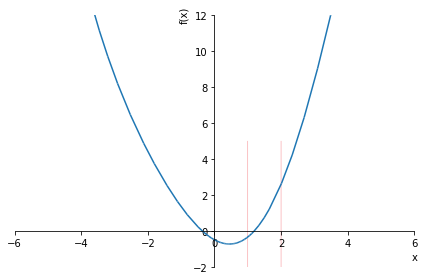

a and b 1.0 1.5


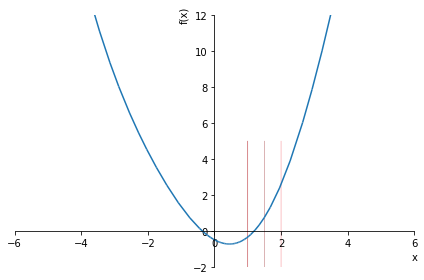

a and b 1.0 1.25


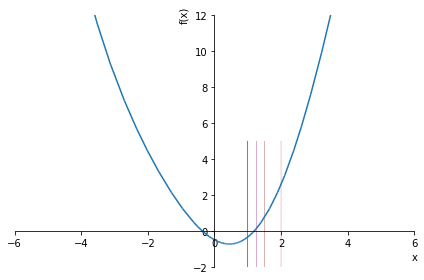

a and b 1.125 1.25


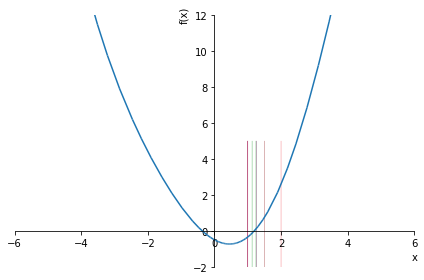

a and b 1.1875 1.25


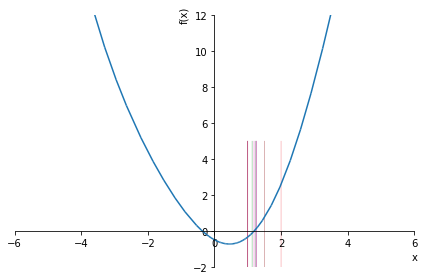

a and b 1.1875 1.21875


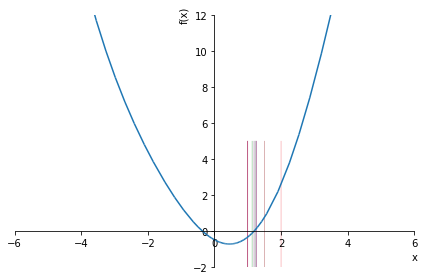

a and b 1.1875 1.203125


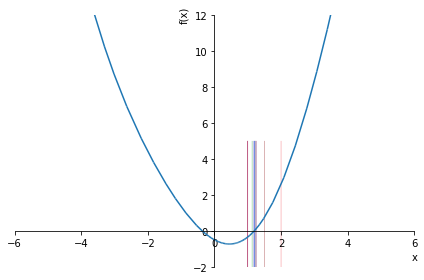

a and b 1.1953125 1.203125


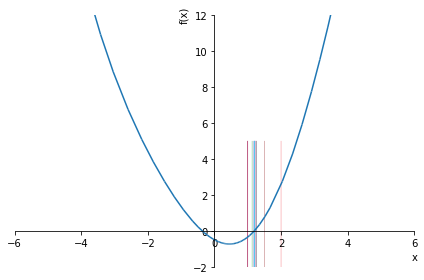

a and b 1.1953125 1.19921875


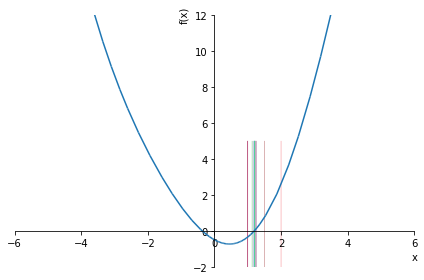

a and b 1.1953125 1.197265625


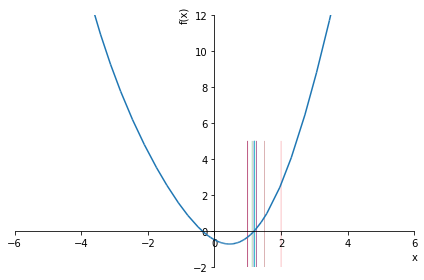

In [15]:
# Representación gráfica del Método de la Bisección, siendo l la tabla de resultados intermedios obtenidos en el ejercicio anterior
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

def plot_fun_and_invervals(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    print("a and b", a, b)
    #q = plot_implicit(And(x > a, x < b), show=False)
    q1 = plot_implicit(x - a, x_var=x, line_color=mycolors[i], show=False)
    q2 = plot_implicit(x - b, x_var=x, line_color=mycolors[i], show=False)
    p.extend(q1)
    p.extend(q2)
    p.show()
plot_fun_and_invervals(f,l)

## Método de la Secante

El **método de la Secante** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$

Salida: $ c_i $

**Algoritmo**:
1. Si $|f(a_i)| > |f(b_i)|$ entonces intercambiar $a_i$ y $b_i$
2. Hacer $c_i = a_i − h_i$ donde $h_i = \frac{f(a_i)(b_i−a_i)}{f(b_i)−f(a_i)}$
3. El nuevo valor de $c_i$ sustituye a $b_i$, es decir, $b_i = c_i$
4. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método abierto**, lo que significa que no se tiene seguridad de que
la raíz está en $[a_i, b_i]$

**Pseudocódigo**

```
BúsquedaPorSecante (f(x), a, b, Δ, ε, n)
  i:=0
  repetir
     i:=i+1
     si abs(f(a)) > abs(f(b)) entonces
        (*/ Intercambiar ‘a’ por ‘b’ /*)
        a <=> b
     h:=f(a)*(b-a)/(f(b)-f(a))
     c:=a-h
     b:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n)
devolver c
```

### Ejercicio 3
Construir una función llamada $secante(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Secante, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[0, 2]$

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.758618831731764 0.7634221996871497
h_n and f_c_n 0.3002238016395526 0.11413166379783507
h_n and f_c_n 0.08879982827842378 0.030624565150047134
Maximo de iteraciones alcanzadas
-0.38902362991797634


Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[-1, 0]$

h_n and f_c_n 0.27152206259288975 0.15807772273829734
h_n and f_c_n 0.1255302511191391 0.04435219540359808
h_n and f_c_n 0.027503554206825133 0.002239023037371335
h_n and f_c_n 0.0013217317241165393 2.820110359064154e-05
Tolerancia o error aceptable. 
-0.37087049122932025


Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo$[0, 2]$ ¿cuántas iteraciones necesitas?

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.758618831731764 0.7634221996871497
h_n and f_c_n 0.3002238016395526 0.11413166379783507
h_n and f_c_n 0.08879982827842378 0.030624565150047134
h_n and f_c_n 0.01878645324067329 0.0010878849120770084
h_n and f_c_n 0.0006444629472630462 9.541339700269713e-06
h_n and f_c_n 5.702301253134901e-06 3.0359490477138706e-09
Tolerancia o error aceptable. 
-0.37088734192581924


## Ejercicio 4
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo en el intervalo $[0,1]$

fa, fb -0.5 -0.3414709848078965
a,   b 0.0 1.0
interchange done
fa, fb -0.3414709848078965 -0.5
a,   b 1.0 0.0
h_n and f_c_n 2.15399675822187 9.460099337422253
1
fa, fb -0.3414709848078965 9.460099337422253
a,   b 1.0 3.15399675822187
fa, fb -0.3414709848078965 9.460099337422253
a,   b 1.0 3.15399675822187
h_n and f_c_n 0.0750417912765313 0.2238951781323555
2
fa, fb -0.3414709848078965 -0.2238951781323555
a,   b 1.0 1.0750417912765313
interchange done
fa, fb -0.2238951781323555 -0.3414709848078965
a,   b 1.0750417912765313 1.0
h_n and f_c_n 0.14289925538503825 0.044990577436720414
3
fa, fb -0.2238951781323555 0.044990577436720414
a,   b 1.0750417912765313 1.2179410466615697
interchange done
fa, fb 0.044990577436720414 -0.2238951781323555
a,   b 1.2179410466615697 1.0750417912765313
h_n and f_c_n 0.02391022909132363 0.004149921205577223
4
fa, fb 0.044990577436720414 -0.004149921205577223
a,   b 1.2179410466615697 1.194030817570246
interchange done
fa, fb -0.004149921205577223 0.04499057

a, b and m 1.0 3.15399675822187 4.55041089770319


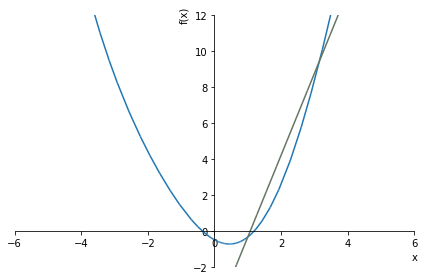

a, b and m 1.0 1.0750417912765313 1.56680437227665


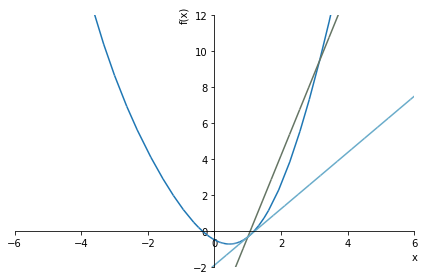

a, b and m 1.0750417912765313 1.2179410466615697 1.88164560301291


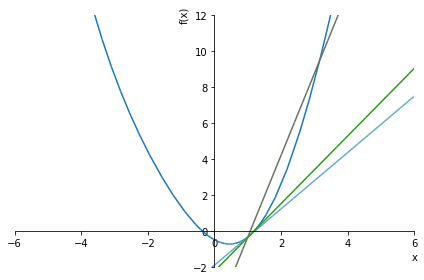

a, b and m 1.2179410466615697 1.194030817570246 2.05520818954133


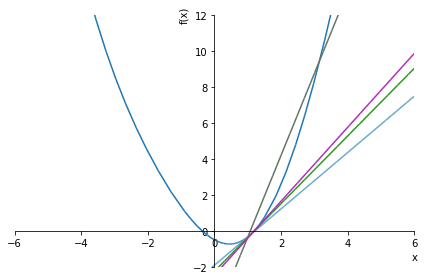

a, b and m 1.194030817570246 1.1960500393827591 2.02310512577201


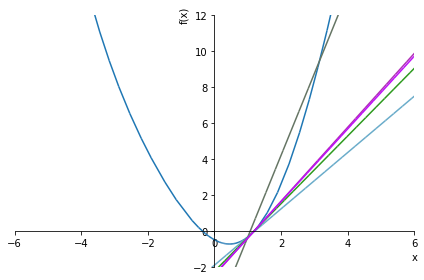

a, b and m 1.1960500393827591 1.1960820808252852 2.02611059335842


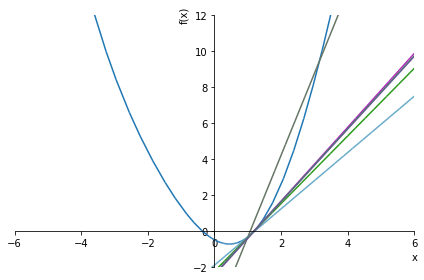

In [22]:
# Representación gráfica del método de la secante, siendo l la tabla de resultados intermedios obtenidos en el ejercicio anterior
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_fun_and_secants(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    m = (f.subs(x,b)-f.subs(x,a))/(b-a)
    print("a, b and m", a, b, m)
    q = plot(m*(x-a)+f.subs(x,a), line_color=mycolors[i], show=False)
    p.extend(q)
    p.show()
plot_fun_and_secants(f,l)

## Método de Regula Falsi

El **método de Regula Falsi** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$ con $f(a_i)·f(b_i) < 0$

Salida: $ c_i $

**Algoritmo**:
1. Si $|f(a_i)| > |f(b_i)|$ entonces intercambiar $a_i$ y $b_i$
2. Sea $c_i = a_i − h_i$ donde $h_i = \frac{f(a_i)(b_i−a_i)}{f(b_i)−f(a_i)}$
3. Comprobamos si cumple Bolzano, $f(a_i)·f(b_i) < 0$, entonces $b_{i+1}=c_i$ y $a_{i+1}=a_i$, en caso contrario, $a_{i+1}=c_i$, $b_{i+1}=b_i$
4. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método cerrado**, lo que significa que la raíz está en $[a_i, b_i]$

**Pseudocódigo**
```
BúsquedaRegulaFalsi (f(x),a,b,Δ,ε,n) 
  i:=0
  repetir
    i:=i+1
    si abs(f(a))>abs(f(b)) entonces
      a<=>b
    h:=f(a)*(b-a)/(f(b)-f(a))
    c:=a-h
    si signo(f(a))*signo(f(c))<0 entonces 
      b:=c
    si no 
      a:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n) devolver c
```



### Ejercicio 5
Construir una función llamada $regulafalsi(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de Regula Falsi, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−3}$, $\epsilon \leq 10^{−3}$ y 4 iteraciones como máximo, en el intervalo $[0,2]$

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
Maximo de iteraciones alcanzadas
1.095310651923324


Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−3}$, $\epsilon \leq 10^{−3}$ y 4 iteraciones como máximo, en el intervalo $[-1,0]$

h_n and f_c_n 0.27152206259288975 0.15807772273829734
h_n and f_c_n 0.07679385993326295 0.03736067258580367
h_n and f_c_n 0.017657960866596187 0.008204263997616701
Tolerancia o error aceptable. 
-0.3659738833927489


Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo, en el intervalo $[0,2]$

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
h_n and f_c_n 0.0616231645096385 0.07707849713106363
h_n and f_c_n 0.024358173590282698 0.02964662595697032
h_n and f_c_n 0.00926286089953321 0.011154187102288882
h_n and f_c_n 0.0034700998070653173 0.004161773034359162
h_n and f_c_n 0.0012926630370176135 0.0015479780857938774
h_n and f_c_n 0.0004805209509195448 0.0005751051087563575
Maximo de iteraciones alcanzadas
1.195798134717781


Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo $[0,2]$ ¿cuántas iteraciones necesitas?

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
h_n and f_c_n 0.0616231645096385 0.07707849713106363
h_n and f_c_n 0.024358173590282698 0.02964662595697032
h_n and f_c_n 0.00926286089953321 0.011154187102288882
h_n and f_c_n 0.0034700998070653173 0.004161773034359162
h_n and f_c_n 0.0012926630370176135 0.0015479780857938774
h_n and f_c_n 0.0004805209509195448 0.0005751051087563575
h_n and f_c_n 0.00017848361257124674 0.00021357103262265031
h_n and f_c_n 6.627621054424473e-05 7.92990361417889e-05
Tolerancia o error aceptable. 
1.1960428945408967


## Ejercicio 6
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo en el intervalo $[0,1]$

fa, fb -0.5 2.590702573174318
a,   b 0.0 2.0
fa, fb -0.5 2.590702573174318
a,   b 0.0 2.0
h_n and f_c_n 0.32355102968479627 0.7132500645589028
1
fa, fb -0.7132500645589028 2.590702573174318
a,   b 0.32355102968479627 2.0
fa, fb -0.7132500645589028 2.590702573174318
a,   b 0.32355102968479627 2.0
h_n and f_c_n 0.36190813471448274 0.6631742644076422
2
fa, fb -0.6631742644076422 2.590702573174318
a,   b 0.685459164399279 2.0
fa, fb -0.6631742644076422 2.590702573174318
a,   b 0.685459164399279 2.0
h_n and f_c_n 0.26791722465167117 0.40644831380715474
3
fa, fb -0.40644831380715474 2.590702573174318
a,   b 0.9533763890509501 2.0
fa, fb -0.40644831380715474 2.590702573174318
a,   b 0.9533763890509501 2.0
h_n and f_c_n 0.14193426287237387 0.18936507474038689
4
fa, fb -0.18936507474038689 2.590702573174318
a,   b 1.095310651923324 2.0
fa, fb -0.18936507474038689 2.590702573174318
a,   b 1.095310651923324 2.0
h_n and f_c_n 0.0616231645096385 0.07707849713106363
5
fa, fb -0.07707849713106363 2.5

a, b and m 0.32355102968479627 2.0 1.97080417968942


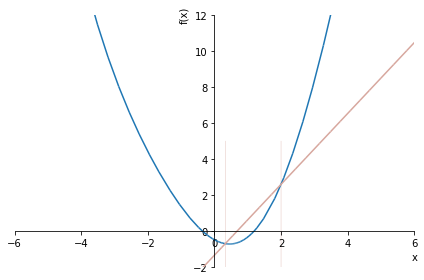

a, b and m 0.685459164399279 2.0 2.47529536508845


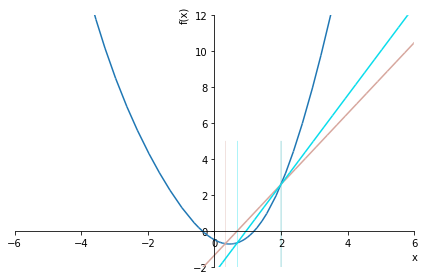

a, b and m 0.9533763890509501 2.0 2.86363775442037


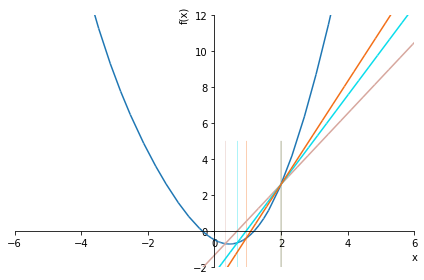

a, b and m 1.095310651923324 2.0 3.07295278078048


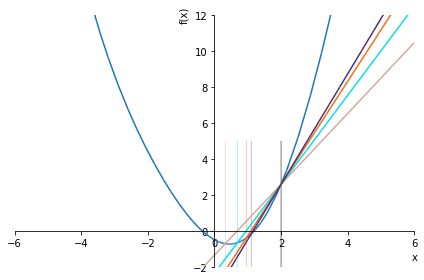

a, b and m 1.1569338164329626 2.0 3.16437917011203


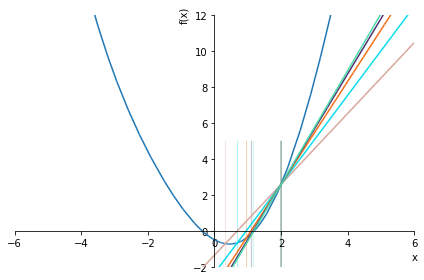

a, b and m 1.1812919900232453 2.0 3.20059064672604


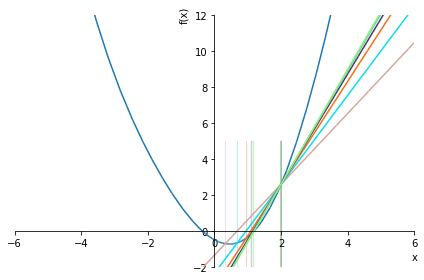

a, b and m 1.1905548509227786 2.0 3.21437068743047


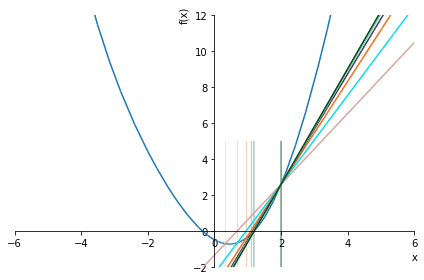

a, b and m 1.194024950729844 2.0 3.21953433739473


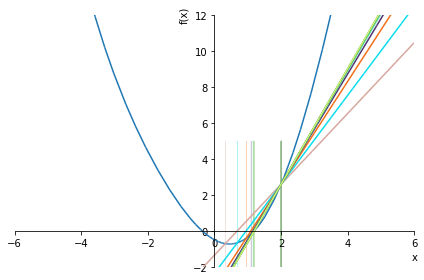

a, b and m 1.1953176137668615 2.0 3.22145805054203


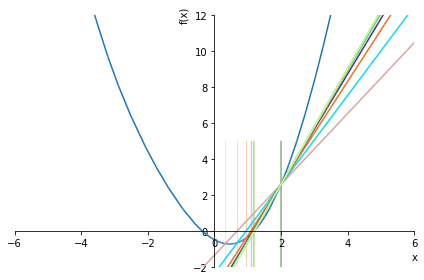

a, b and m 1.195798134717781 2.0 3.22217317585270


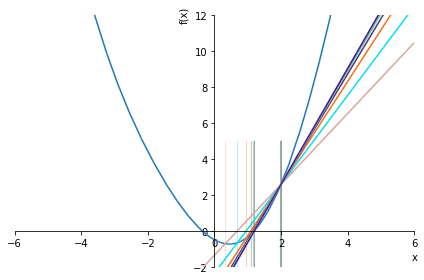

In [30]:
# Representación gráfica del método de Regula Falsi, siendo l la tabla de resultados intermedios obtenidos en el ejercicio anterior
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_fun_and_secants_and_intervals(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    m = (f.subs(x,b)-f.subs(x,a))/(b-a)
    print("a, b and m", a, b, m)
    q = plot(m*(x-a)+f.subs(x,a), line_color=mycolors[i], show=False)
    p.extend(q)
    q1 = plot_implicit(x - a, x_var=x, line_color=mycolors[i], show=False)
    q2 = plot_implicit(x - b, x_var=x, line_color=mycolors[i], show=False)
    p.extend(q1)
    p.extend(q2)
    p.show()
plot_fun_and_secants_and_intervals(f,l)

## Método de Newton

El **método de Newton** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$

Salida: $ c_i $

**Algoritmo**:
1. $h_i = \frac{f(a_i)}{f'(a_i)}$
2. Sea $c_i = a_i − h_i$
3. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método abierto**, lo que significa que no es seguro que se alcance la raíz$

**Pseudocódigo**
```
BúsquedaPorNewton (f(x),a,ε,Δ,n)
  f’(x):=df(x)/dx
  i:=0
  repetir
    i:=i+1
    h:=f(a)/f’(a)
    c:=a-h
    a:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n)
  devolver c
```

## Ejercicio 7
Construir una función llamada $newton(f,a,b,errorfun,tolerancia,maxiter)$ que implemente el Método de Newton, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

## Ejercicio 8
Prueba la función con $f$ partiendo del punto $a=0$ cuando $\Delta \leq 10^{−9}$ y 10 iteraciones como máximo

h_n and f_c_n 0.5 0.229425538604203
h_n and f_c_n 0.12219198412943003 0.01162285865846896
h_n and f_c_n 0.006897464467170733 3.8851054631472426e-05
h_n and f_c_n 2.321102786338833e-05 4.4111458930018443e-10
Tolerancia o error aceptable. 
-0.3708873403755359


## Ejercicio 9
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f$ partiendo del punto $a=0$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo

a, fa 0.0 -0.5
h_n and f_c_n 0.5 0.229425538604203
1
a, fa -0.5 0.229425538604203
h_n and f_c_n 0.12219198412943003 0.01162285865846896
2
a, fa -0.37780801587057 0.01162285865846896
h_n and f_c_n 0.006897464467170733 3.8851054631472426e-05
3
a, fa -0.3709105514033993 3.8851054631472426e-05
h_n and f_c_n 2.321102786338833e-05 4.4111458930018443e-10
Tolerancia o error aceptable. 
-0.3708873403755359 [Iteracion(a=-0.5, b=-0.5, h=0.5, c=-0.5, f_c=0.229425538604203), Iteracion(a=-0.37780801587057, b=-0.37780801587057, h=-0.12219198412943003, c=-0.37780801587057, f_c=0.0116228586584690), Iteracion(a=-0.3709105514033993, b=-0.3709105514033993, h=-0.006897464467170733, c=-0.3709105514033993, f_c=3.88510546314724e-5)]


a and m -0.5 -1.87758256189037


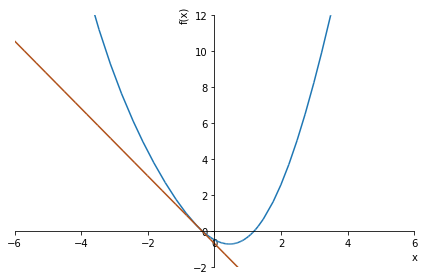

a and m -0.37780801587057 -1.68509148742836


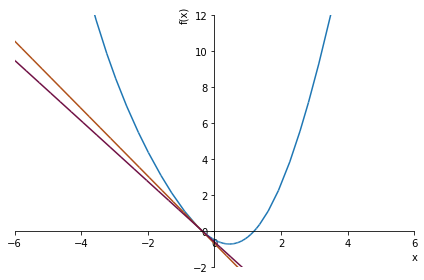

a and m -0.3709105514033993 -1.67381879252119


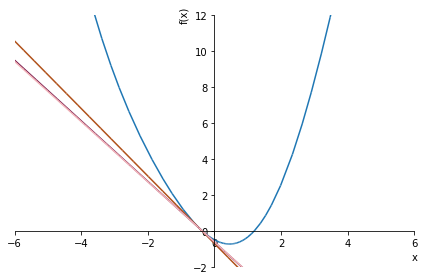

In [35]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_fun_and_tangents(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  fp = diff(f,x) 
  for i in range(len(l)):
    a = l[i].a
    m = fp.subs(x,a)
    print("a and m", a, m)
    q = plot(m*(x-a)+f.subs(x,a), line_color=mycolors[i], show=False)
    p.extend(q)
    p.show()
plot_fun_and_tangents(f,l)

## Descenso por Gradiente

Cuando tenemos funciones de $n$ variables, es decir, del tipo $f(x_1,\ldots,x_n)$ adaptamos el Método de Newton **para optimización** de la siguiente forma:


*   En el método de Newton tenemos que: $x^{t+1}= x^n-\frac{f(x^t)}{f'(x^t)}$
*   Ahora hacemos $\mathbf{x}^{t+1} = \mathbf{x}^t - \gamma\nabla f(\mathbf{x}^t)$ 
donde $\mathbf{x}^t=(x_1^t,x_2^t,\ldots,x_n^t)$ son las coordenadas de la solución $t-$ésima, $$\nabla f(\mathbf{x}^t)=\left(\frac{\partial f}{\partial x_1^t},\frac{\partial f}{\partial x_2^t},\ldots, \frac{\partial f}{\partial x_n^t}\right)$$ es el gradiente de $f$ en el punto $\mathbf{x}^t$ y $\gamma\in\mathbb{R}$ es una constante the amortiguamiento o de paso. 

Empezamos en $t=0$, es decir en $\mathbf{x}^0$ y terminamos cuando la norma del gradiente sea lo suficientemente pequeña: $$\| \nabla f(\mathbf{x}^t)\|<\epsilon$$
Eso querrá decir que estamos cerca de alcanzar un punto crítico de $f$, o sea que $\nabla f(\mathbf{x}^t)\approx \mathbf{0}$.

#### En Sympy
A nivel simbólico, si declaramos la función, p.e. $g(x,y)=x^2 + xy + 3y^2$, podemos construir $\nabla g(\mathbf{x})$, con $\mathbf{x}=(x,y)$, construyendo un vector simbólico con `Matrix([g])` y luego calculado su Jacobiano `G.jacobian([x,y])`.


In [36]:
g = x**2 + x*y + 3*y**2
G = Matrix([g])
G.jacobian([x,y])


Matrix([[2*x + y, x + 6*y]])

Ese vector almacena las derivadas parciales simbólicas. Para instanciar dichas derivadas en un punto (p.e. (0,0)) haremos:

In [37]:
G.jacobian([x,y]).subs([(x,0), (y,0)])

Matrix([[0, 0]])

#### En Scipy
Al igual que sucede con la búsqueda de raíces, *scipy* tiene su package para resolver problemas de optimización: `scipy.optimize`. Importamos `minimize` y elegimos un método (p.e. el Gradiente Conjugado, que además del gradiente usa la Hessiana). 

Consultad 
https://scipy-lectures.org/advanced/mathematical_optimization/ para más detalles. 

**Importante:** es necesario pasarle a *minimize* una función *callable*, esto es del tipo `def g_np(x):` donde `x` es un array de numpy. 

In [38]:
from sympy import lambdify
from scipy.optimize import minimize

def g_np(x):   # The function for numpy purposes (not sympy)
    return x[0]**2 + x[0]*x[1] + 3*x[1]**2
x0 = np.array([2,1])
solucion = minimize(g_np, x0, method='CG', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 24
         Gradient evaluations: 6


In [39]:
solucion.x

array([-1.54755886e-09, -7.09661996e-10])

## Ejercicio 10
Construir una función llamada $descenso\_gradiente2D(g,x0,gamma,epsilon,N)$ que implemente el Método del descenso del gradiente, teniendo en cuenta que la función $g(x,y)$ es simbólica y luego es necesario traducirla internamente a numpy. 

**Importante**: El único paso delicado es tener en cuenta que el vector gradiente es en realidad del tipo **[[**$\frac{\partial g}{\partial x},\frac{\partial g}{\partial y}$**]]** (forma (1,2)) y hay que pasarlo a **[**$\frac{\partial g}{\partial x},\frac{\partial g}{\partial y}$**]** (forma (2,)).

Para detectar la condición de convergencia, llamamos a `np.linalg.norm` para calcular la norma. 

**Finalmente**, construimos como siempre una `lista_iteraciones` para almacenar las soluciones parciales de cara a su posterior visualización.

In [41]:
x0 = np.array([2,1])
solucion, l = descenso_gradiente2D(g,x0,gamma=0.01,epsilon=0.001,N=100)
print("Solucion: ", solucion)

Jacobian:  Matrix([[2*x + y, x + 6*y]])
x0:  [2 1]
Máximo número de iteraciones alcanzadas
Solucion:  [ 0.28238176 -0.06430879]


Vemos que la solución alcanzada aún está lejos del óptimo $(0,0)$.

**Nuestra visualización** del descenso por gradiente se construye no obstante pasándole la función g como callable, ya que eso facilita mucho la construcción del grafico 3D que mostrará la función $z=f(x,y)$. Sobre este gráfico superponemos, en rojo, las soluciones parciales (trayectoria), sacadas de `lista_iteraciones`. 

In [59]:
def plot_gradient_descent2D(g,lista_iteraciones, xleft, xright, yleft, yright):
  # Prepare the figure for 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Prepare the grid 
  x = np.linspace(xleft, xright, 500)
  y = np.linspace(yleft, yright, 500)
  X, Y = np.meshgrid(x, y)
  Z = g(X, Y)

  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 50, cmap='binary')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
  ax.set_title('surface');

  # List to np array 
  keypoints = np.array(lista_iteraciones)
  # Get z values
  list_z = []
  for k in range(len(lista_iteraciones)):
    x_k = lista_iteraciones[k][0]
    y_k = lista_iteraciones[k][1]
    list_z.append(g(x_k,y_k))
 
  # Trajectory
  keypoints_x = keypoints[:,0]
  keypoints_y = keypoints[:,1]
  keypoints_z = np.array(list_z)
  ax.plot3D(keypoints_x,keypoints_y,keypoints_z, 'red')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


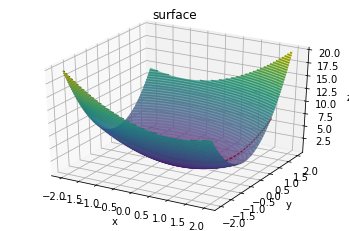

In [43]:
# Define our function z= g(x,y)
def g_np(x, y):
    return x**2 + x*y + 3*y**2 
plot_gradient_descent2D(g_np,l, xleft=-2, xright=2, yleft=-2, yright=2)

#### Comparando Scipy con Nuestra implementación: 
Para comparar nuestra implementación con la de scipy, es interesante estudiar la **Función de Rosenbrock**. Se trata de un tipo de funciones que son suma de términos cuadráticos y están sujetas a mínimos locales. Su forma es: 
$$ f(x_1,x_2,\ldots,x_n)=a(1 + x_1)^2+\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2$$ donde $a>0$. 

**Interesante.** Ese tipo de funciones tienen el punto óptimo en $(1,1,\ldots,1)$. 

Con Scipy: 

In [44]:
def g_np(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
minimize(g_np, [0, -2], method="CG")    

     fun: 1.9753338186196247e-11
     jac: array([-5.14157725e-07, -2.68837081e-06])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 11
    njev: 23
  status: 0
 success: True
       x: array([0.99999401, 0.99998667])

Con Nuestra Implementación: 

In [45]:
g = .5*(1 - x)**2 + (y - x**2)**2
x0 = np.array([0,-2])
solucion, l = descenso_gradiente2D(g,x0,gamma=0.01,epsilon=0.001,N=100)
print("Solucion: ", solucion)

Jacobian:  Matrix([[-4*x*(-x**2 + y) + 1.0*x - 1.0, -2*x**2 + 2*y]])
x0:  [ 0 -2]
Máximo número de iteraciones alcanzadas
Solucion:  [ 0.31976421 -0.21645704]


Como vemos, nos quedamos bastante lejos del óptimo $(1,1)$.

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


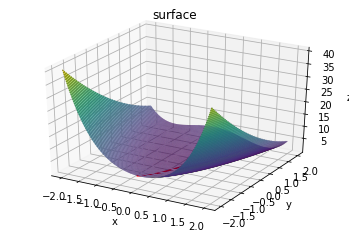

In [46]:
def g_np(x,y):   # The rosenbrock function
    return .5*(1 - x)**2 + (y - x**2)**2

plot_gradient_descent2D(g_np,l, xleft=-2, xright=2, yleft=-2, yright=2)

## Resolución de Sistemas No-Lineales
Como vemos en clase de teoría, nn sistema multidimensional está formado por $m$ ecuaciones **no-lineales** de $n$ variables cada una: 
$$g_1(x_1,x_2,\ldots,x_n)=0$$
$$g_2(x_1,x_2,\ldots,x_n)=0$$
$$\ldots$$
$$g_m(x_1,x_2,\ldots,x_n)=0$$
Si consideramos cada una de las $g_i$ como las filas de una matriz 
$$G = \begin{pmatrix}
g_1(x_1,x_2,\ldots,x_n) \\
g_2(x_1,x_2,\ldots,x_n) \\
\ldots\\
g_m(x_1,x_2,\ldots,x_n)
\end{pmatrix}$$
Tenemos que la función a minimizar (función objetivo) puede ser 
$$F(x_1,x_2,\ldots,x_n) = G^TG = \frac{1}{2}\sum_{i=1}^m g_i(x_1,x_2,\ldots,x_m)^2$$ cuyo óptimo es $(0,0,\ldots,0)$ lo que significa que hemos encontrado una instanciación de las $n$ variables $x_1^{\ast},x_2^{\ast},\ldots,x_n^{\ast}$ que hace **todas** las $g_i$ **simultaneamente** 0. 

Para estas funciones, tenemos que su vector gradiente es $\nabla F = J^T_G G$, donde $J_G$ es el Jacobiano de G (una matrix $m\times n$): 
$$J_G = \begin{pmatrix}
\frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & \ldots & \frac{\partial g_1}{\partial x_n} \\
\frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & \ldots & \frac{\partial g_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial g_m}{\partial x_1} & \frac{\partial g_m}{\partial x_2} & \ldots & \frac{\partial g_m}{\partial x_n}
\end{pmatrix}$$


#### En Sympy
A nivel simbólico, veamos cómo resolver el siguiente sistema: 


$$x^2-3y = 0$$
$$x-y = 0$$
que obviamente tiene una solución en $(x=0,y=0)$.
En Sympy simplemente llamamos a `solve()` (ver https://docs.sympy.org/latest/modules/solvers/solvers.html):

In [47]:
from sympy import solve, Poly, Eq, Function, exp, sin
from sympy.abc import x, y, z, a, b
#solve([sin(x)+y**2, exp(x)+2*y-1], set=True)
solve([x**2 - 3*y, x - y], set=True)


([x, y], {(0, 0), (3, 3)})

Pero este solver no puede resolver este sistema: 
$$sin(x) + y^2 = 0$$
$$e^x + 2y -1  = 0$$

## En Scipy
En cambio, un solver numérico al que le pasamos un *callable* nos da una solución aproximada, eso sí tras pasale un punto de partida: 



In [48]:
from scipy.optimize import fsolve
def func(x):
    return [np.sin(x[0]) - x[1]**2,
            np.exp(x[0]) + 2*x[1] - 1]
root = fsolve(func, [1, 1])
root

array([ 3.15340019e-34, -1.77578157e-17])

## Nuestra Implementación
Formulemos este último problema como un descenso por gradiente. 

In [49]:
g1 = sin(x)- y**2
g2 = exp(x) + 2*y - 1
G = Matrix([g1, g2])
G

Matrix([
[  -y**2 + sin(x)],
[2*y + exp(x) - 1]])

In [50]:
F = (1/2)*(G.T*G)
F

Matrix([[0.5*(-y**2 + sin(x))**2 + 0.5*(2*y + exp(x) - 1)**2]])

In [51]:
J_G = G.jacobian([x,y])
J_G

Matrix([
[cos(x), -2*y],
[exp(x),    2]])

In [52]:
Grad = J_G.T*G
Grad

Matrix([
[(-y**2 + sin(x))*cos(x) + (2*y + exp(x) - 1)*exp(x)],
[         -2*y*(-y**2 + sin(x)) + 4*y + 2*exp(x) - 2]])

In [53]:
Grad_also = F.jacobian([x,y])
Grad_also

Matrix([[1.0*(-y**2 + sin(x))*cos(x) + 1.0*(2*y + exp(x) - 1)*exp(x), -2.0*y*(-y**2 + sin(x)) + 4.0*y + 2.0*exp(x) - 2.0]])

In [54]:
Grad.T - Grad_also

Matrix([[0, 0]])

In [55]:
x0 = np.array([1,1])
solucion, l = descenso_gradiente2D(F,x0,gamma=0.01,epsilon=0.001,N=100)
print("Solucion: ", solucion)

Jacobian:  Matrix([[1.0*(-y**2 + sin(x))*cos(x) + 1.0*(2*y + exp(x) - 1)*exp(x), -2.0*y*(-y**2 + sin(x)) + 4.0*y + 2.0*exp(x) - 2.0]])
x0:  [1 1]
Máximo número de iteraciones alcanzadas
Solucion:  [ 0.02911691 -0.0128151 ]


In [56]:
F[0]

0.5*(-y**2 + sin(x))**2 + 0.5*(2*y + exp(x) - 1)**2

In [57]:

F_np = lambdify([x, y], F[0], modules=['numpy'])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


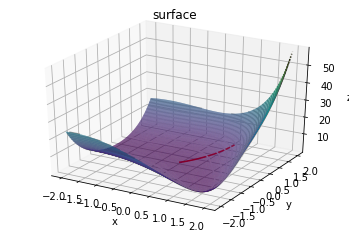

In [58]:
plot_gradient_descent2D(F_np,l, xleft=-2, xright=2, yleft=-2, yright=2)

## Aplicación: Curve Fitting
Como hemos visto en teoría, la resolución de sistemas no-lineales puede aplicarse a ajuste de curvas. En concreto, supongamos que tenemos un conjunto de $m$ puntos 2D $S=\{(x_i,y_i),\;i=1,2,\ldots,m\}$ y queremos encontrar los $n=2$ parámetros del círculo $\theta = (x_c,y_c,r)$ (coordenadas del centro y radio) al que mejor se ajustan.

Idealmente, si el ajuste fuera perfecto, todos los puntos cumplirían la ecuación implícita del círculo $(x_i - x_c)^2 + (y_i - y_c)^2 = r^2$. Por lo tanto tenemos $m$ restricciones (una por cada punto) y la matriz del sistema a resolver es: 
$$G = \begin{pmatrix}
g_1: (x_1 - x_c)^2 + (y_1 - y_c)^2 - r^2 \\
g_2: (x_2 - x_c)^2 + (y_2 - y_c)^2 - r^2 \\
\ldots\\
g_m: (x_m - x_c)^2 + (y_m - y_c)^2 - r^2 \\
\end{pmatrix}$$
Adaptando la función objetivo general, tenemos: 
$$F(x_c,y_c,r) = G^TG = \frac{1}{2}\sum_{i=1}^m ((x_1 - x_c)^2 + (y_1 - y_c)^2 - r^2)^2$$
Con lo que basta con usar Sympy, Scipy o Nuestra Implementación. Pero **antes**, generemos los datos experimentales. 

In [60]:
import random 

def generar_datos_circulo(nsamples, x_c, y_c, r):
  # Create the angles 
  # Include one sample more for avoiding 2pi = 0
  angles = np.linspace(0,2*np.pi, nsamples+1)
  # For each sample appy a polar equation
  lista_puntos = []
  for i in range(nsamples):
    print(angles[i])
    if random.random():  
      r_per = r + random.random()*r/4
    else: 
      r_per = r - random.random()*r/4
    x_i = x_c + r_per*cos(angles[i])
    y_i = x_c + r_per*sin(angles[i])
    lista_puntos.append(np.array([x_i,y_i]))
  return lista_puntos

def visualizar_datos_circulo(lista_puntos):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax = plt.axes(projection='rectilinear')
  lxs = []
  lys = []
  for i in range(len(lista_puntos)): 
    lxs.append(lista_puntos[i][0])
    lys.append(lista_puntos[i][1])
  xs = np.array(lxs)
  ys = np.array(lys)
  ax.scatter(xs,ys, marker="o", c="blue")
  plt.show()


In [61]:
l_p = generar_datos_circulo(nsamples=5, x_c=0, y_c=0, r=5)
print(l_p)

0.0
1.2566370614359172
2.5132741228718345
3.7699111843077517
5.026548245743669
[array([5.94055124925679, 0], dtype=object), array([1.64561980975070, 5.06469699691919], dtype=object), array([-4.09247890108794, 2.97335996660503], dtype=object), array([-4.49325351743041, -3.26453976952287], dtype=object), array([1.61407498702188, -4.96761201532361], dtype=object)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


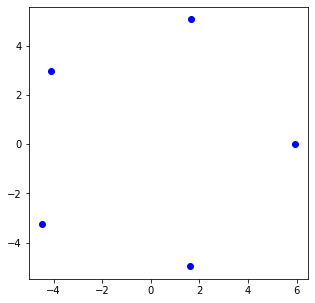

In [62]:
visualizar_datos_circulo(l_p)

**Construir F simbólica** Para optimizar seguiremos los siguientes pasos: 

1.   Definimos la función simbólica $F$
2.   La lambdificamos si procede
3.   La pasamos al método de optimización 

Como tenemos 3 variables $(x_c, y_c, r)$ y tantas restricciones como puntos, podemos construir una función que haga el paso 1. 

In [63]:
from sympy.abc import x, y, r # Variables de nuestro problema
def construirF(xc, yc, r, lista_puntos): 
  F = 0
  for i in range(len(lista_puntos)): 
    punto = lista_puntos[i]
    x_i = punto[0]
    y_i = punto[1] 
    gi = ((x_i - xc)**2 + (y_i - yc)**2 - r**2)**2
    F = F + gi
  return 0.5*F
F = construirF(x,y,r,l_p)

In [64]:
F

140.254175866933*(-0.059707254533869*r**2 + 0.527864045000421*(1 - 0.336319857410939*y)**2 + (-0.244350679421746*x - 1)**2)**2 + 203.804465827024*(-0.0495311206503102*r**2 + (-0.222555882084276*x - 1)**2 + 0.52786404500042*(-0.306321892395312*y - 1)**2)**2 + 304.481338253455*(-0.0405232867083727*r**2 + 0.105572809000084*(1 - 0.619549901981377*x)**2 + (-0.201303965952916*y - 1)**2)**2 + 328.990893618737*(-0.0389845983097774*r**2 + 0.105572809000084*(1 - 0.607673773781014*x)**2 + (1 - 0.197445177985631*y)**2)**2 + 622.697313339811*(-0.0283365195168173*r**2 + 0.0283365195168173*y**2 + (1 - 0.168334546415218*x)**2)**2

**Resolución en Scipy.** En este caso, en lugar de usar `fsolve` despues de lambdificar, le pasaremos la función lambdificada a `minimize` para que la trate NO COMO UN SISTEMA DE ECUACIONES sino como una función genérica. 

Inicializamos la búsqueda con $(x_c=1, y_c=1, r=2)$

In [65]:
F_np = lambdify([(x, y, r)], F, modules=['numpy'])
x0 = np.array([1,1,2])
solucion = minimize(F_np, x0, method='CG', options={'disp': True})
solucion

Optimization terminated successfully.
         Current function value: 17.581466
         Iterations: 11
         Function evaluations: 115
         Gradient evaluations: 23


     fun: 17.581465669179977
     jac: array([-4.05311584e-06,  1.43051147e-06, -2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 115
     nit: 11
    njev: 23
  status: 0
 success: True
       x: array([ 0.25436005, -0.08762346,  5.42923256])

## Ejercicio 11
Construir una función llamada $descenso\_gradienteF(g,x0,gamma,epsilon,N)$ que modifique la versión anterior para que funcione con 3 variables $(x, y, r)$.



In [67]:
x0 = np.array([1,1,2]) # Misma inicialización
solucion, l = descenso_gradienteF(F,x0,gamma=10e-05,epsilon=0.001,N=100)
print("Solucion: ", solucion)

Jacobian:  Matrix([[622.697313339811*(0.113346078067269*x - 0.673338185660873)*(-0.0283365195168173*r**2 + 0.0283365195168173*y**2 + (1 - 0.168334546415218*x)**2) + 328.990893618737*(0.15593839323911*x - 0.256615309014973)*(-0.0389845983097774*r**2 + 0.105572809000084*(1 - 0.607673773781014*x)**2 + (1 - 0.197445177985631*y)**2) + 304.481338253455*(0.162093146833491*x - 0.261630493871603)*(-0.0405232867083727*r**2 + 0.105572809000084*(1 - 0.619549901981377*x)**2 + (-0.201303965952916*y - 1)**2) + 203.804465827024*(0.198124482601241*x + 0.890223528337104)*(-0.0495311206503102*r**2 + (-0.222555882084276*x - 1)**2 + 0.52786404500042*(-0.306321892395312*y - 1)**2) + 140.254175866933*(0.238829018135476*x + 0.977402717686985)*(-0.059707254533869*r**2 + 0.527864045000421*(1 - 0.336319857410939*y)**2 + (-0.244350679421746*x - 1)**2), 70.5802982900929*y*(-0.0283365195168173*r**2 + 0.0283365195168173*y**2 + (1 - 0.168334546415218*x)**2) + 328.990893618737*(0.15593839323911*y - 0.789780711942523)*

**MUY IMPORTANTE.** Nuestra implementación es muy dependiente de la inicialización de las variables $(x_c, y_c, r)$ y del factor $\gamma$: un valor muy pequeño hace que no cambie el gradiente y un muy alto hace que se dispare hasta llegar a `nan`. En cambio, Scipy usa el método GC o Gradiente Conjugado en el que se considera la Hessiana (segundas derivadas). Tener una idea de cómo cambian las derivadas es, en la práctica crucial para llegar a una buena solución. 

**Finalmente**, como no podemos visualizar la función de coste (es 3D) podemos no obstante visualizar las iteraciones, es decir los círculos que el algoritmo ha obtenido en cada iteración. 

In [68]:
l

[array([1, 1, 2]),
 array([0.95171029, 0.94041289, 2.0546107 ]),
 array([0.90665462, 0.88458705, 2.10984129]),
 array([0.86459009, 0.83224971, 2.16569389]),
 array([0.82529636, 0.78315303, 2.22216552]),
 array([0.78857287, 0.737071  , 2.27924824]),
 array([0.75423651, 0.69379688, 2.33692929]),
 array([0.72211966, 0.65314097, 2.39519121]),
 array([0.69206847, 0.61492877, 2.45401192]),
 array([0.66394146, 0.57899933, 2.51336481]),
 array([0.63760823, 0.54520392, 2.57321889]),
 array([0.61294838, 0.51340484, 2.63353888]),
 array([0.58985061, 0.48347434, 2.69428533]),
 array([0.5682118 , 0.45529373, 2.75541478]),
 array([0.54793636, 0.42875262, 2.81687993]),
 array([0.52893554, 0.40374815, 2.87862979]),
 array([0.51112688, 0.38018442, 2.94060992]),
 array([0.49443364, 0.35797192, 3.00276265]),
 array([0.47878442, 0.337027  , 3.06502733]),
 array([0.46411267, 0.31727147, 3.12734063]),
 array([0.45035635, 0.29863217, 3.18963685]),
 array([0.4374576 , 0.2810406 , 3.25184822]),
 array([0.42536

1 1 2


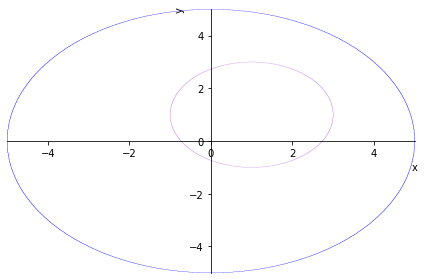

0.9517102881971765 0.940412885640119 2.0546106956342354


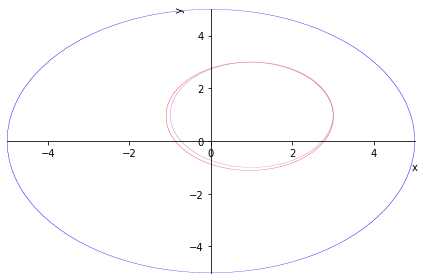

0.9066546175268008 0.8845870493690386 2.1098412923240435


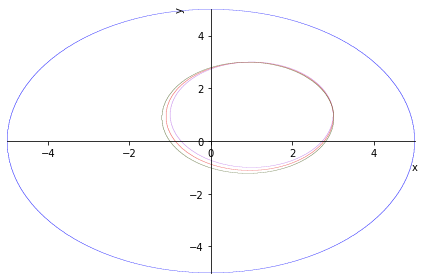

0.8645900910015781 0.8322497107109706 2.165693894538214


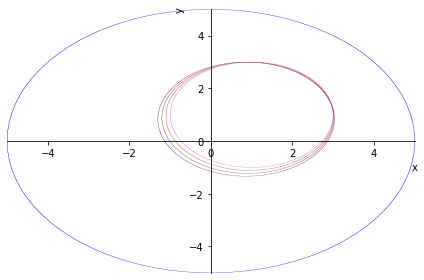

0.8252963625172985 0.7831530261333253 2.222165519508326


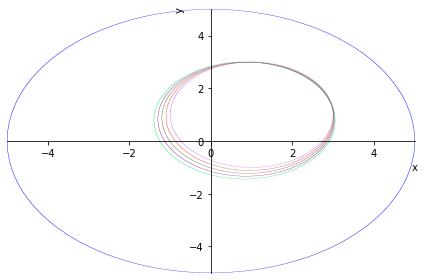

0.7885728712752152 0.7370709986579661 2.2792482374378924


In [ ]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_circles_from_gradient_descentF(l, x_c, y_c, r):
  p = plot_implicit(Eq((x-x_c)**2 + (y-y_c)**2, r**2), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i][0]
    b = l[i][1]
    c = l[i][2]
    print(a,b,c)
    q = plot_implicit(Eq((x-a)**2 + (y-b)**2, c**2), line_color=mycolors[i], show=False)
    p.extend(q)
    p.show()
plot_circles_from_gradient_descentF(l,x_c=0,y_c=0,r=5)